In [30]:
## importing important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [31]:
## importing data
data = pd.read_excel("/content/drive/MyDrive/oasis_store_data.xlsx")

In [32]:
data

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country,Region
0,2021-09-09 07:00:26,Macbook Pro 13â€_x009d_ i7,apple-13-i7,1811.00,1.0,1811.00,Bulgaria,EMEA
1,2021-09-09 07:03:08,Macbook Pro 13â€_x009d_ i7,apple-13-i7,1811.00,1.0,1811.00,Bulgaria,EMEA
2,2021-09-09 07:44:50,Dell Multi-device Wireless Mouse - MS5320W,dell-MS5320W,25.00,1.0,25.00,United States,EMEA
3,2021-09-09 07:46:06,Apple Magic Mouse,apple-magic-mouse,100.00,1.0,100.00,Bulgaria,NaN
4,2021-09-09 07:46:20,Apple Magic Mouse,apple-magic-mouse,100.00,1.0,100.00,Bulgaria,NaN
...,...,...,...,...,...,...,...,...
25025,2022-03-21 10:39:21,"Dell Latitude 7420 14"" 2-in-1",dell-7420-emea,1360.00,1.0,1360.00,United Kingdom,EMEA
25026,2022-03-21 10:46:02,Dell Wireless Keyboard & Mouse Combo - KM7120W,dell-KM7120W-emea,40.00,1.0,40.00,Bulgaria,EMEA
25027,2022-03-21 10:49:01,Jabra Evolve 40 - Wired Headset,jabra-evolve40-emea,79.00,1.0,79.00,Bulgaria,EMEA
25028,2022-03-21 11:04:24,Jabra Evolve2 40,rakesh-24089-989-899,10800.00,1.0,10800.00,India,APAC


# Exploring data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25030 entries, 0 to 25029
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Purchase Date     25030 non-null  datetime64[ns]
 1   Product Name      25030 non-null  object        
 2   OEM               25030 non-null  object        
 3   Item Price USD    25030 non-null  float64       
 4   Ordered Qty       25030 non-null  float64       
 5   Row Total         25030 non-null  float64       
 6   Shipping Country  25030 non-null  object        
 7   Region            24421 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.5+ MB


In [34]:
data.describe()

,Item Price USD,Ordered Qty,Row Total
count,25030.000000,25030.000000,25030.000000
mean,5616.649270,1.000879,5620.239376
std,27387.133718,0.032218,27390.278117
min,0.000000,1.000000,0.000000
25%,79.000000,1.000000,79.000000
50%,199.000000,1.000000,199.000000
75%,616.880000,1.000000,616.880000
max,240802.940000,3.000000,240802.940000


In [35]:
data.shape     ##(rows , columns)

(25030, 8)

In [36]:
data.isna().sum()

Purchase Date         0
Product Name          0
OEM                   0
Item Price USD        0
Ordered Qty           0
Row Total             0
Shipping Country      0
Region              609
dtype: int64

In [37]:
data.Region.unique()

array(['EMEA', nan, 'APAC', 'AMER', 'Central & East Europe (CEMEA)'],
      dtype=object)

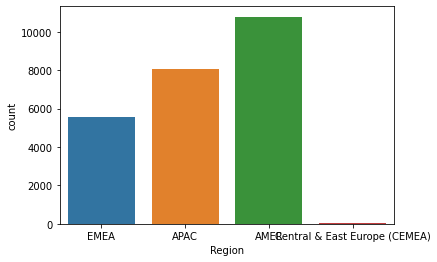

In [38]:
sns.countplot(x = "Region", data = data)

In [39]:
data["Shipping Country"].unique()

array(['Bulgaria', 'United States', 'Australia', 'Ireland', 'India',
       'Germany', 'United Arab Emirates', 'Egypt', 'Switzerland',
       'Costa Rica', 'Singapore', 'China', 'Turkey', 'Spain',
       'United Kingdom', 'Italy', 'France', 'Poland', 'Austria',
       'South Africa', 'Czechia', 'Saudi Arabia', 'Russia', 'Colombia',
       'Nigeria', 'Qatar', 'Canada', 'South Korea', 'Portugal', 'Japan',
       'Croatia', 'Netherlands', 'Argentina', 'Denmark', 'Norway',
       'Armenia', 'Brazil', 'Malaysia', 'Mexico', 'Slovakia', 'Vietnam',
       'Hong Kong SAR China', 'Thailand', 'Belgium', 'Sweden', 'Israel',
       'Chile', 'Hungary', 'New Zealand', 'Romania', 'Ukraine', 'Finland',
       'Philippines', 'Kenya', 'Indonesia', 'Greece', 'Lithuania',
       'Taiwan, Province of China', 'Peru', 'Lebanon', 'Pakistan',
       'Morocco', 'Jamaica'], dtype=object)

In [40]:
data[data["Region"].isna()]

,Purchase Date,Product Name,OEM,Item Price USD,Ordered Qty,Row Total,Shipping Country,Region
3,2021-09-09 07:46:06,Apple Magic Mouse,apple-magic-mouse,100.0,1.0,100.0,Bulgaria,NaN
4,2021-09-09 07:46:20,Apple Magic Mouse,apple-magic-mouse,100.0,1.0,100.0,Bulgaria,NaN
5,2021-09-09 07:46:49,Apple Magic Mouse,apple-magic-mouse,100.0,1.0,100.0,Bulgaria,NaN
6,2021-09-09 07:47:40,Apple Magic Mouse,apple-magic-mouse,100.0,1.0,100.0,Bulgaria,NaN
78,2021-09-14 12:24:56,Jabra Evolve 75 - Wireless Headset,jabra-evolve75,329.0,1.0,329.0,India,NaN
...,...,...,...,...,...,...,...,...
23518,2022-03-09 11:19:12,Apple Magic Mouse,apple-magic-mouse-emea,100.0,1.0,100.0,Saudi Arabia,NaN
23519,2022-03-09 11:19:12,Logitech BRIO - 4K Ultra HD Webcam,logitech-brio-emea,199.0,1.0,199.0,Saudi Arabia,NaN
23520,2022-03-09 11:19:12,Jabra Evolve 75 - Wireless Headset,jabra-evolve75-emea,329.0,1.0,329.0,Saudi Arabia,NaN
23521,2022-03-09 11:19:12,Jabra Speak 710,jabra-speak-710-emea,298.0,1.0,298.0,Saudi Arabia,NaN


In [41]:
data[data["Region"].isna()]["Shipping Country"].unique()

array(['Bulgaria', 'India', 'Spain', 'United States', 'Germany', 'Italy',
       'Ireland', 'Singapore', 'Russia', 'Australia', 'United Kingdom',
       'Austria', 'Colombia', 'Czechia', 'Mexico', 'Belgium', 'France',
       'Hungary', 'Netherlands', 'Philippines', 'Switzerland', 'Japan',
       'Saudi Arabia'], dtype=object)

In [42]:
for i in range(data.shape[1]):
  print(data.columns[i] , len(data[data.columns[i]].unique()))

Purchase Date 17491
Product Name 156
OEM 374
Item Price USD 363
Ordered Qty 3
Row Total 378
Shipping Country 63
Region 5


# Exploratory Data Analysis

In [43]:
data.corr()

,Item Price USD,Ordered Qty,Row Total
Item Price USD,1.000000,-0.001526,0.999945
Ordered Qty,-0.001526,1.000000,0.004427
Row Total,0.999945,0.004427,1.000000


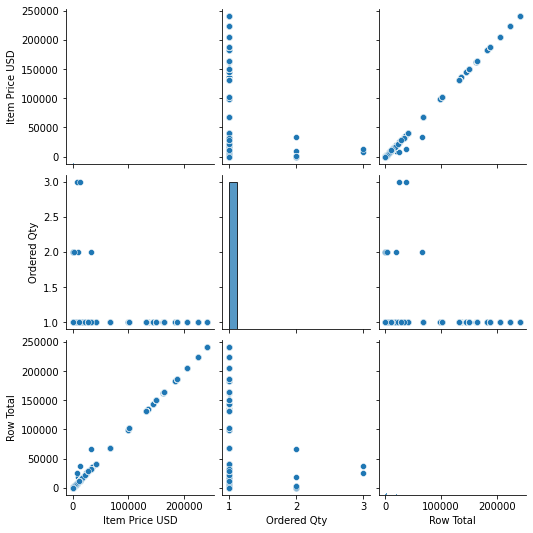

In [44]:
sns.pairplot(data)

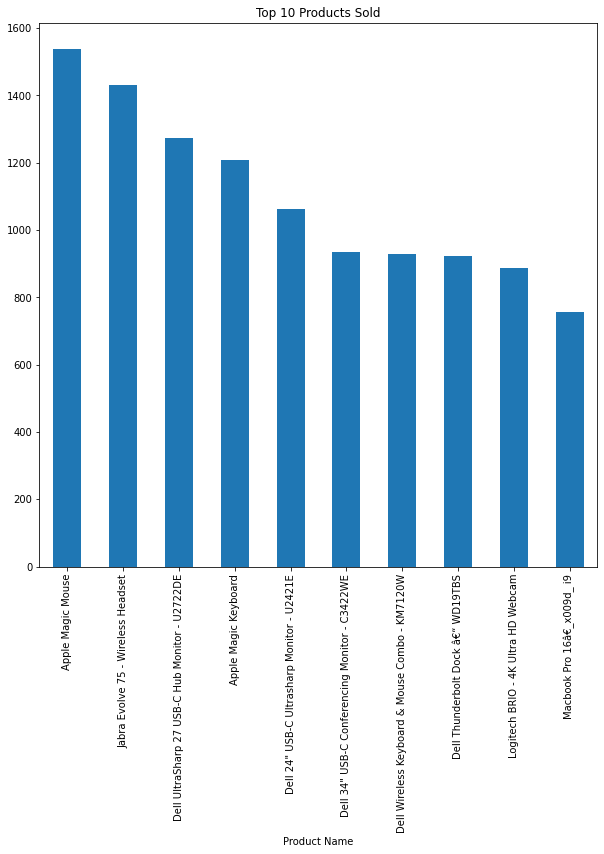

In [45]:

data.groupby("Product Name").sum()["Ordered Qty"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 Products Sold")

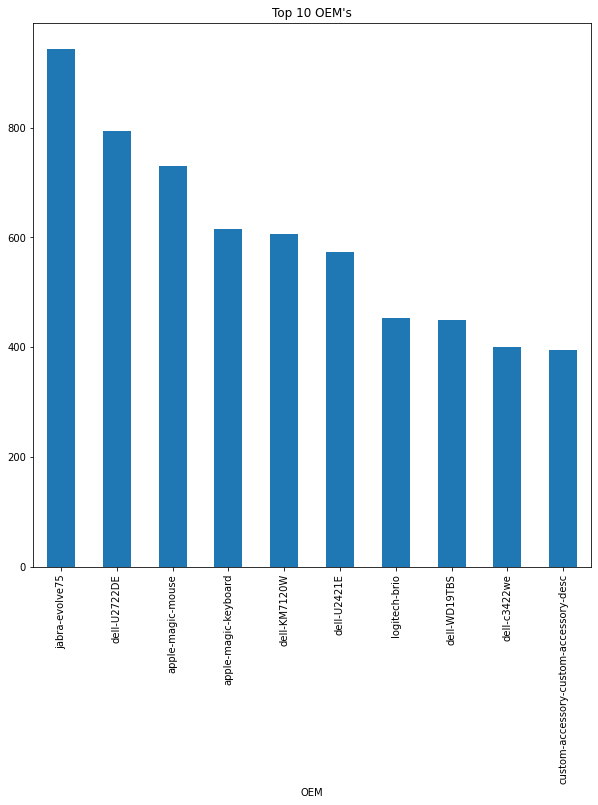

In [46]:

data.groupby("OEM").sum()["Ordered Qty"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 OEM's")

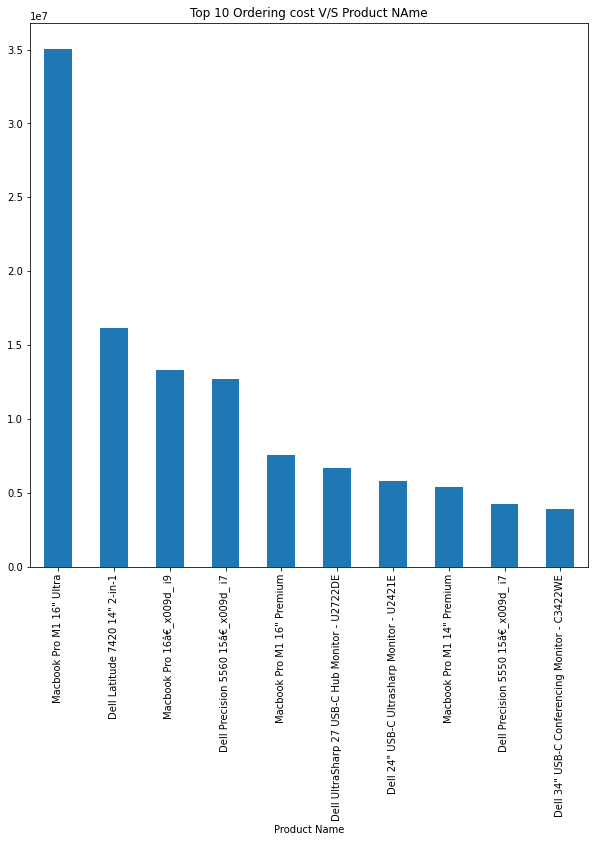

In [47]:

data.groupby("Product Name").sum()["Row Total"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 Ordering cost V/S Product NAme")

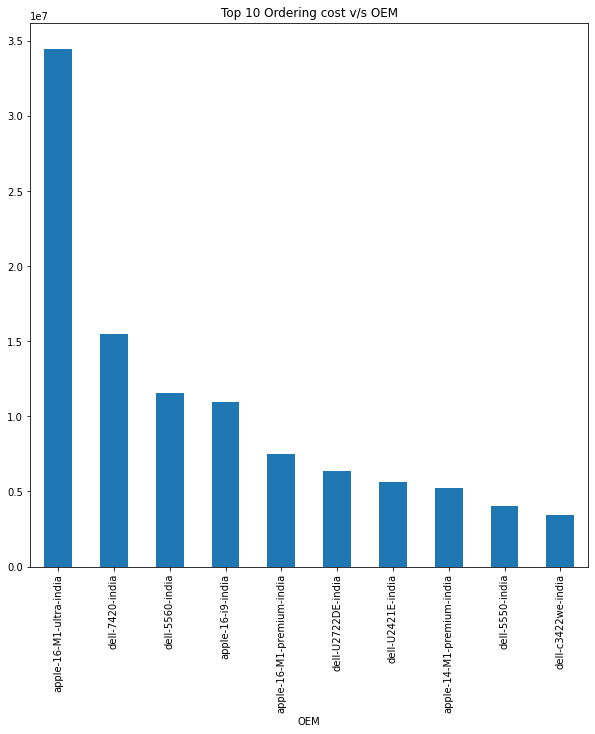

In [48]:

data.groupby("OEM").sum()["Row Total"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 Ordering cost v/s OEM")

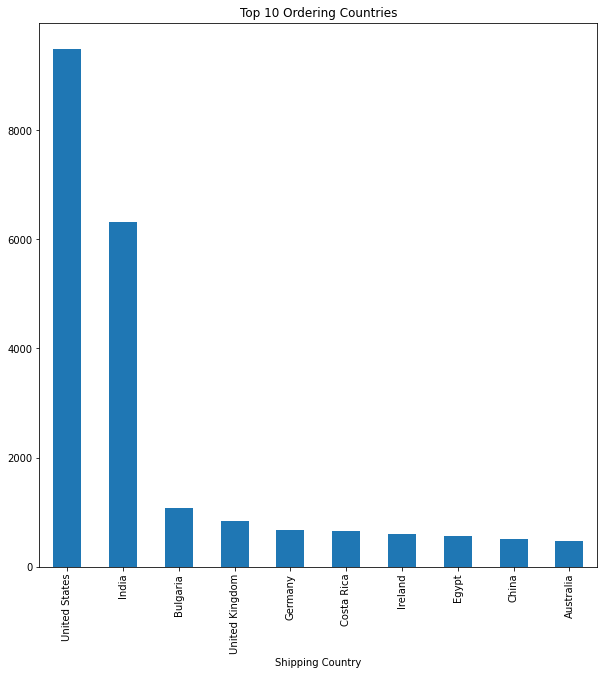

In [49]:
data.groupby("Shipping Country").sum()["Ordered Qty"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 Ordering Countries")

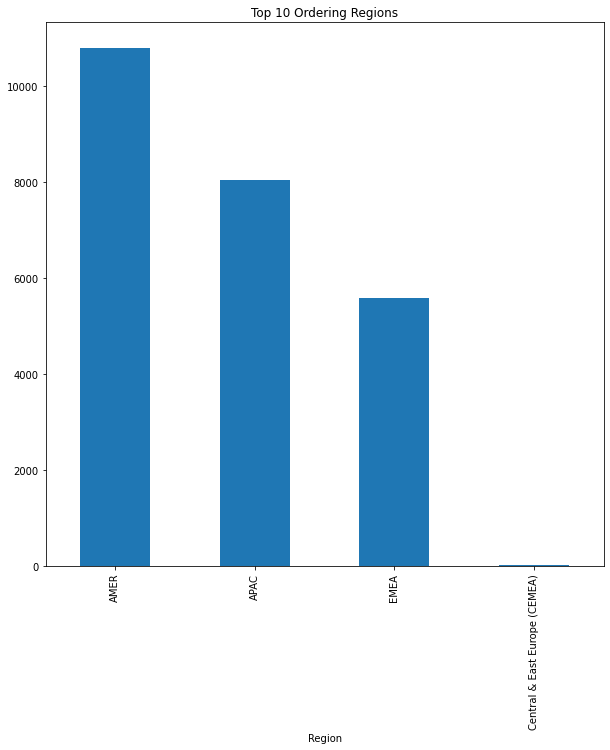

In [50]:
data.groupby("Region").sum()["Ordered Qty"].sort_values(ascending = False)[:10].plot(kind = "bar" , figsize = (10,10) , title = "Top 10 Ordering Regions")

# Normalising Data

In [51]:
data_categorical = pd.get_dummies(data.drop(["Purchase Date","Item Price USD" , "Ordered Qty","Row Total" , "Region"], axis = 1))

In [52]:
data_categorical

,"Product Name_ 67W USB-C Power Adapter for 14"" M1","Product Name_ Computer Privacy Filter 13.3""",Product Name_ Mini DisplayPort to HDMI Cable,"Product Name_3M Privacy Filter 15.6""","Product Name_3M Touch Anti-Glare Privacy Filter 14""",Product Name_Alogic USB-C Fusion Core 5-in-1 Hub,Product Name_Alogic USB-C Fusion ALPHA 5-in-1 Hub,Product Name_Alogic USB-C to Gigabit Ethernet Adapter,Product Name_Apple 67W USB-C Power Adapter,Product Name_Apple 85W MagSafe 2 Power Adapter,...,Shipping Country_Sweden,Shipping Country_Switzerland,"Shipping Country_Taiwan, Province of China",Shipping Country_Thailand,Shipping Country_Turkey,Shipping Country_Ukraine,Shipping Country_United Arab Emirates,Shipping Country_United Kingdom,Shipping Country_United States,Shipping Country_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data_new = pd.concat([data , data_categorical] , axis = 1)

In [54]:
data_new.drop(["Product Name","OEM","Shipping Country" , "Region"] , axis = 1 , inplace = True)

In [55]:
data_new

,Purchase Date,Item Price USD,Ordered Qty,Row Total,"Product Name_ 67W USB-C Power Adapter for 14"" M1","Product Name_ Computer Privacy Filter 13.3""",Product Name_ Mini DisplayPort to HDMI Cable,"Product Name_3M Privacy Filter 15.6""","Product Name_3M Touch Anti-Glare Privacy Filter 14""",Product Name_Alogic USB-C Fusion Core 5-in-1 Hub,...,Shipping Country_Sweden,Shipping Country_Switzerland,"Shipping Country_Taiwan, Province of China",Shipping Country_Thailand,Shipping Country_Turkey,Shipping Country_Ukraine,Shipping Country_United Arab Emirates,Shipping Country_United Kingdom,Shipping Country_United States,Shipping Country_Vietnam
0,2021-09-09 07:00:26,1811.00,1.0,1811.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-09-09 07:03:08,1811.00,1.0,1811.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-09-09 07:44:50,25.00,1.0,25.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2021-09-09 07:46:06,100.00,1.0,100.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-09-09 07:46:20,100.00,1.0,100.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,2022-03-21 10:39:21,1360.00,1.0,1360.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25026,2022-03-21 10:46:02,40.00,1.0,40.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25027,2022-03-21 10:49:01,79.00,1.0,79.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25028,2022-03-21 11:04:24,10800.00,1.0,10800.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
scaler = StandardScaler()   ## normalising our data
scaled_data = scaler.fit_transform(data_new.drop(["Purchase Date" , "Ordered Qty"] , axis = 1))

In [57]:
scaled_data = pd.DataFrame(scaled_data)

In [58]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,585,586,587,588,589,590,591,592,593,594
0,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
1,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
2,-0.204175,-0.204282,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193
3,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
4,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,-0.155428,-0.155541,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,5.376283,-0.781263,-0.048193
25026,-0.203627,-0.203735,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
25027,-0.202203,-0.202311,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
25028,0.189266,0.189113,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193


In [59]:
processed_data = pd.concat([data[["Purchase Date","Ordered Qty"]] ,scaled_data ] , axis = 1)

In [60]:
processed_data

,Purchase Date,Ordered Qty,0,1,2,3,4,5,6,7,...,585,586,587,588,589,590,591,592,593,594
0,2021-09-09 07:00:26,1.0,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
1,2021-09-09 07:03:08,1.0,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
2,2021-09-09 07:44:50,1.0,-0.204175,-0.204282,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193
3,2021-09-09 07:46:06,1.0,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
4,2021-09-09 07:46:20,1.0,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,2022-03-21 10:39:21,1.0,-0.155428,-0.155541,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,5.376283,-0.781263,-0.048193
25026,2022-03-21 10:46:02,1.0,-0.203627,-0.203735,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
25027,2022-03-21 10:49:01,1.0,-0.202203,-0.202311,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
25028,2022-03-21 11:04:24,1.0,0.189266,0.189113,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193


In [61]:
processed_data.drop("Purchase Date" , inplace = True , axis = 1)

# Creating Train and test data set

In [62]:
train_data_len = int(len(processed_data)*0.85)  ## taking 85% of total data as our training data

print(train_data_len)


21275


In [63]:
train_data = processed_data[0 : train_data_len]
train_data = train_data.drop("Ordered Qty" , axis =1)   # dropping ordered quantity column as it is out target

In [64]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,585,586,587,588,589,590,591,592,593,594
0,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
1,-0.138960,-0.139075,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
2,-0.204175,-0.204282,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193
3,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
4,-0.201436,-0.201544,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21270,-0.037670,-0.037797,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,-0.781263,-0.048193
21271,-0.204923,-0.205031,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193
21272,-0.193884,-0.193992,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193
21273,-0.202496,-0.202604,-0.006321,-0.006321,-0.012643,-0.012643,-0.017881,-0.038993,-0.024488,-0.015485,...,-0.049832,-0.044739,-0.026826,-0.039504,-0.055911,-0.014135,-0.081709,-0.186002,1.279979,-0.048193


In [65]:
# creating training data
x_train = []   # independent variables
y_train = []   # dependent variable   

for i in range(15 , len(train_data)):  # we have taken a window of 15 , that is next forecasted value depends on previous 15 sales
  x_train.append(train_data[i-15:i])
  y_train.append(processed_data["Ordered Qty"][i])


In [66]:
# converting lists into numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

In [67]:
x_train.shape

(21260, 15, 595)

In [68]:
y_train.shape

(21260,)

# creating lstm model


In [69]:
# importing deep learning modules
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout


In [70]:
## defining our model layers
model = Sequential()
model.add(LSTM(64 , return_sequences=True , input_shape= (x_train.shape[1] , 595)))
model.add(LSTM(50 , return_state= False))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))

In [71]:

model.compile(optimizer="adam" , loss = "mean_squared_error")

In [72]:
model.fit(x_train , y_train , batch_size = 1 , epochs = 7) # fitting training data to our model for 7 epochs

Epoch 1/7
21260/21260 [==============================] - 297s 14ms/step - loss: 0.0026
Epoch 2/7
21260/21260 [==============================] - 293s 14ms/step - loss: 0.0015
Epoch 3/7
21260/21260 [==============================] - 293s 14ms/step - loss: 0.0015
Epoch 4/7
18859/21260 [=========================>....] - ETA: 33s - loss: 0.0024

KeyboardInterrupt: ignored

In [73]:
model = keras.models.load_model("/content/drive/MyDrive/vmware_model_1.h5")

In [74]:
model.evaluate(x_train , y_train)  # evaluating model on training data

665/665 [==============================] - 8s 11ms/step - loss: 0.0012


0.001222954480908811

In [82]:
## creating test data
test_data = processed_data[train_data_len - 15 : ]
test_data = test_data.drop("Ordered Qty" , axis = 1)
x_test = []
y_test = processed_data["Ordered Qty"][train_data_len:]

for i in range(15 , len(test_data)):
  x_test.append(test_data[i-15:i])

In [83]:
## converting lists to numpy arrays
x_test , y_test =   np.array(x_test) , np.array(y_test)

In [86]:
x_test.shape , y_test.shape

((3755, 15, 595), (3755,))

In [87]:
model.evaluate(x_test , y_test)  # evaluating model on test data

118/118 [==============================] - 1s 11ms/step - loss: 7.6189e-05


7.61894989409484e-05

In [88]:
x_test.shape

(3755, 15, 595)

In [89]:
y_test.shape

(3755,)

In [90]:
predictions = model.predict(x_test)  # predicting on test data

In [91]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)  # calculating root mean square error

In [92]:
rmse

0.0002383835782382523

In [93]:
y_test.shape , predictions.shape

((3755,), (3755, 1))

In [94]:
predictions_df = pd.DataFrame({"True_Sakes_value" : y_test }) ## creating predictions data frame

In [95]:
predictions_df["Predicted_sales"] = predictions

In [96]:
predictions_df.index = data["Purchase Date"][train_data_len:]

In [97]:
predictions_df

,True_Sakes_value,Predicted_sales
Purchase Date,,
2022-02-23 18:53:26,1.0,1.0
2022-02-23 18:55:41,1.0,1.0
2022-02-23 18:58:18,1.0,1.0
2022-02-23 19:01:31,1.0,1.0
2022-02-23 19:11:15,1.0,1.0
...,...,...
2022-03-21 10:39:21,1.0,1.0
2022-03-21 10:46:02,1.0,1.0
2022-03-21 10:49:01,1.0,1.0


In [ ]:
model.save("/content/drive/MyDrive/vmware_model_1.h5") # saving our model

In [ ]:
# def get_dummies_and_normalise(data_original):
#   """
#   Takes origina; data set and then first 
#     - Converts object data type variables to one hot ecoded 
#     - then stanrdize the data except Ordered quantity and date column
#     - then create scaled data frame
#     - returns scaled and processed data
#   """
#   data_categorical = pd.get_dummies(data_original.drop(["Purchase Date","Item Price USD" , "Ordered Qty","Row Total" , "Region"], axis = 1))
#   data_new = pd.concat([data_original , data_categorical] , axis = 1)
#   data_new.drop(["Product Name","OEM","Shipping Country" , "Region"] , axis = 1 , inplace = True)

#   scaler = StandardScaler()  ## declaring scaler object
#   scaled_data = scaler.fit_transform(data_new.drop(["Purchase Date" , "Ordered Qty"] , axis = 1))  

#   scaled_data = pd.DataFrame(scaled_data)

#   processed_data = pd.concat([data_original["Ordered Qty"] ,scaled_data ] , axis = 1)

#   return processed_data

In [ ]:
# def create_fit_data(processed_data):
#   x = []
#   y = []
#   for i in range(15 , len(processed_data)):
#     x.append(processed_data[i-15:i])
#     y.append(processed_data["Ordered Qty"][i])
#     x , y = np.array(x) , np.array(y)

# return x , y    